#BARUUU FIX

In [ ]:
import pandas as pd

# Load Dataset Asli
df = pd.read_csv("Social_Network_Ads.csv")

print("Dataset sebelum dibersihkan:")
print(df.head())
print("\nInfo awal:")
print(df.info())

# Hapus Kolom yang Tidak Dibutuhkan
df = df.drop(columns=["User ID"])   # ID tidak memiliki makna prediktif

# Bersihkan Kolom Gender (Encode Male/Female)
df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})

# Cek dan Tangani Missing Values
print("\nMissing values sebelum dibersihkan:")
print(df.isnull().sum())

# Jika ada missing value → drop barisnya
df = df.dropna()

# Simpan Data yang Sudah Dibersihkan
df.to_csv("social_network_ads(clean).csv", index=False)

print("\nDataset setelah dibersihkan:")
print(df.head())

print("\nFile baru berhasil disimpan: cleaned_social_network_ads.csv")


Dataset sebelum dibersihkan:
    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

Info awal:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None

Missing values sebelum dibersihkan:
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Dataset setelah dibersihkan:
  

sklearn


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv("/content/social_network_ads(clean).csv")

# Misal kolom yang dipakai
X = df[['Age', 'EstimatedSalary']]      # fitur
y = df['Purchased']                    # target (0/1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Normalisasi (wajib untuk logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Logistic Regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Prediksi
y_pred = model.predict(X_test_scaled)

# Evaluasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Akurasi: 0.8625
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



manual


In [ ]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("/content/social_network_ads(clean).csv")
X = df[['Age', 'EstimatedSalary']].values
y = df['Purchased'].values

# Normalisasi
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Tambahkan bias/intercept
X = np.c_[np.ones((X.shape[0], 1)), X]   # shape -> (n_samples, 3)

# Parameter awal
theta = np.zeros(X.shape[1])  # [bias, w1, w2]

# Sigmoid / Hypothesis
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost Function (Log Loss)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1/m) * (y * np.log(h) + (1-y) * np.log(1-h)).sum()
    return cost

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = (1/m) * X.T.dot(h - y)
        theta = theta - learning_rate * gradient
        cost_history.append(compute_cost(X, y, theta))

        if i % 100 == 0:
            print(f"Iterasi {i}, Cost = {cost_history[-1]}")

    return theta, cost_history

# Jalankan training manual
theta_final, cost_hist = gradient_descent(
    X, y, theta, learning_rate=0.01, iterations=2000
)

print("\nParameter akhir (theta):")
print(theta_final)
print("\nCost terakhir:", cost_hist[-1])


Iterasi 0, Cost = 0.6917549770222067
Iterasi 100, Cost = 0.5850035750677866
Iterasi 200, Cost = 0.521422181858258
Iterasi 300, Cost = 0.48095398772322995
Iterasi 400, Cost = 0.45351092487986394
Iterasi 500, Cost = 0.4339154895372865
Iterasi 600, Cost = 0.41934435009000837
Iterasi 700, Cost = 0.408157173146041
Iterasi 800, Cost = 0.39934574503681947
Iterasi 900, Cost = 0.3922600124871818
Iterasi 1000, Cost = 0.38646363270939504
Iterasi 1100, Cost = 0.3816535983445043
Iterasi 1200, Cost = 0.37761333703086486
Iterasi 1300, Cost = 0.37418418450988794
Iterasi 1400, Cost = 0.3712473945058966
Iterasi 1500, Cost = 0.36871242936146803
Iterasi 1600, Cost = 0.36650912434383337
Iterasi 1700, Cost = 0.36458231418575454
Iterasi 1800, Cost = 0.3628880671849662
Iterasi 1900, Cost = 0.36139099423720566

Parameter akhir (theta):
[-0.8263965   1.69169178  0.86072565]

Cost terakhir: 0.3600748271687212


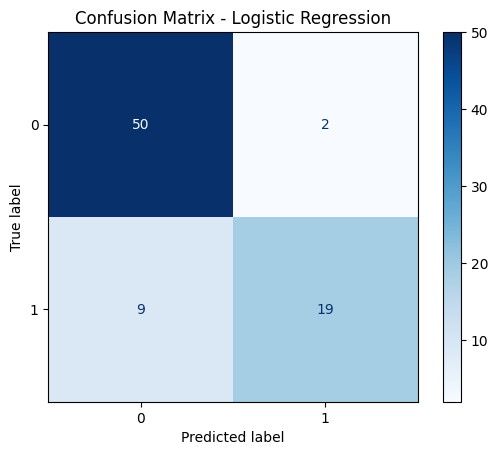

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# === Load dataset ===
df = pd.read_csv("/content/social_network_ads(clean).csv")
X = df[['Age', 'EstimatedSalary']]
y = df['Purchased']

# === Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# === Scaling + Model ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# === Predict ===
y_pred = model.predict(X_test_scaled)

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")

plt.title("Confusion Matrix - Logistic Regression")
plt.show()
